In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

In [2]:
files = ["split_1.csv","split_2.csv"]
dfs = []
for filename in files:
    i_df = pd.read_csv("../eval/quantifications/{}".format(filename))
    dfs.append(i_df)

df = pd.concat(dfs,sort=False)
filenames = list(df["filename"].unique())


full_df = pd.read_csv("../pre_results/full_ref_df.csv")
acc_df = pd.read_csv("../pre_results/acc_ref_df.csv")

full_df = full_df[full_df["filename"].isin(filenames)]
acc_df = acc_df[acc_df["filename"].isin(filenames)]

c_df = pd.merge(df,full_df,on="filename",suffixes=("","_full"))
c_df = pd.merge(c_df,acc_df,on="filename",suffixes=("_model","_acc"))

df["model"]="model"
full_df["model"]="full"
acc_df["model"]="acc"
df = pd.concat([df,full_df,acc_df],sort=False)

c_df["gaba_conc_cr_model_error"] = c_df["gaba_conc_cr_model"]-c_df["gaba_conc_cr_full"]
c_df["gaba_conc_cr_model_abs_error"] = abs(c_df["gaba_conc_cr_model_error"])
c_df["gaba_conc_water_model_error"] = c_df["gaba_conc_water_model"]-c_df["gaba_conc_water_full"]
c_df["gaba_conc_water_model_abs_error"] = abs(c_df["gaba_conc_water_model_error"])

c_df["gaba_conc_cr_acc_error"] = c_df["gaba_conc_cr_acc"]-c_df["gaba_conc_cr_full"]
c_df["gaba_conc_cr_acc_abs_error"] = abs(c_df["gaba_conc_cr_acc_error"])
c_df["gaba_conc_water_acc_error"] = c_df["gaba_conc_water_acc"]-c_df["gaba_conc_water_full"]
c_df["gaba_conc_water_acc_abs_error"] = abs(c_df["gaba_conc_water_acc_error"])

In [3]:
#### CR difference analysis
## simple table and analysis
print("Conc Cr Abs Error:")
print(f"Means + Std => Model: {c_df['gaba_conc_cr_model_abs_error'].mean():.3f} +- {c_df['gaba_conc_cr_model_abs_error'].std():.3f} / Acc: {c_df['gaba_conc_cr_acc_abs_error'].mean():.3f} +- {c_df['gaba_conc_cr_acc_abs_error'].std():.3f} => p-value: {st.wilcoxon(c_df['gaba_conc_cr_model_abs_error'],c_df['gaba_conc_cr_acc_abs_error']).pvalue:.4f}")
print(f"Medians => Model: {c_df['gaba_conc_cr_model_abs_error'].median():.3f} / Acc: {c_df['gaba_conc_cr_acc_abs_error'].median():.3f}")
print("")
print("Conc water Abs Error:")
print(f"Means + Std => Model: {c_df['gaba_conc_water_model_abs_error'].mean():.3f} +- {c_df['gaba_conc_water_model_abs_error'].std():.3f} / Acc: {c_df['gaba_conc_water_acc_abs_error'].mean():.3f} +- {c_df['gaba_conc_water_acc_abs_error'].std():.3f} => p-value: {st.wilcoxon(c_df['gaba_conc_water_model_abs_error'],c_df['gaba_conc_water_acc_abs_error']).pvalue:.4f}")
print(f"Medians => Model: {c_df['gaba_conc_water_model_abs_error'].median():.3f} / Acc: {c_df['gaba_conc_water_acc_abs_error'].median():.3f}")


Conc Cr Abs Error:
Means + Std => Model: 0.060 +- 0.334 / Acc: 0.116 +- 0.782 => p-value: 0.0133
Medians => Model: 0.013 / Acc: 0.007

Conc water Abs Error:
Means + Std => Model: 0.904 +- 5.242 / Acc: 1.615 +- 12.236 => p-value: 0.0030
Medians => Model: 0.220 / Acc: 0.130


In [4]:
i_df = c_df.sort_values("gaba_conc_cr_acc_abs_error",ascending=False)
print(i_df[["filename","gaba_conc_cr_acc_abs_error","gaba_conc_cr_model_abs_error"]])

   filename  gaba_conc_cr_acc_abs_error  gaba_conc_cr_model_abs_error
58  p10_s02                    6.568276                      2.824313
7    g7_s11                    1.095723                      0.443978
2    g4_s12                    0.049015                      0.013737
6    g7_s10                    0.047452                      0.013931
8    g7_s12                    0.034605                      0.022479
..      ...                         ...                           ...
70   s8_s02                    0.001227                      0.016119
27   s3_s10                    0.001213                      0.000869
21  p10_s10                    0.001145                      0.034601
29   s3_s12                    0.000364                      0.009354
68   s5_s03                    0.000127                      0.011824

[72 rows x 3 columns]


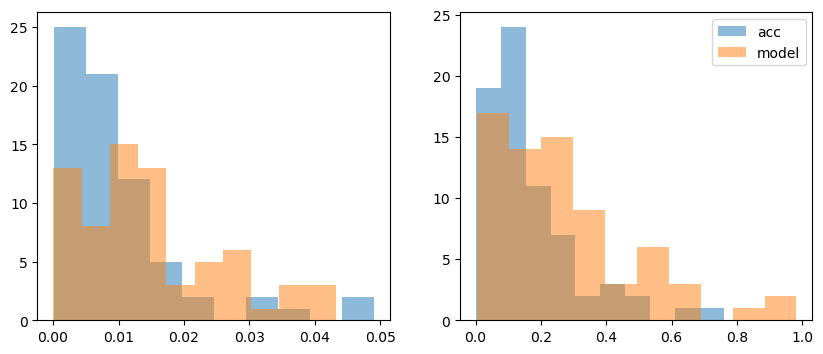

Conc Cr Abs Error:
Means + Std => Model: 0.015 +- 0.011 / Acc: 0.010 +- 0.010 => p-value: 0.0027
Medians => Model: 0.012 / Acc: 0.007

Conc water Abs Error:
Means + Std => Model: 0.273 +- 0.223 / Acc: 0.167 +- 0.146 => p-value: 0.0019
Medians => Model: 0.217 / Acc: 0.123


In [22]:
### simple hists

##filter for histogram - 
filter_for_histogram = ["p10_s02","g7_s11"]
i_df = c_df[~c_df["filename"].isin(filter_for_histogram)]

fig,ax = plt.subplots(1,2,figsize=(10,4))

bins_x = []

ax[0].hist(i_df["gaba_conc_cr_acc_abs_error"],alpha=0.5,label="acc")
ax[0].hist(i_df["gaba_conc_cr_model_abs_error"],alpha=0.5,label="model")

ax[1].hist(i_df["gaba_conc_water_acc_abs_error"],alpha=0.5,label="acc")
ax[1].hist(i_df["gaba_conc_water_model_abs_error"],alpha=0.5,label="model")

plt.legend()

plt.show()

## filtered results:

print("Conc Cr Abs Error:")
print(f"Means + Std => Model: {i_df['gaba_conc_cr_model_abs_error'].mean():.3f} +- {i_df['gaba_conc_cr_model_abs_error'].std():.3f} / Acc: {i_df['gaba_conc_cr_acc_abs_error'].mean():.3f} +- {i_df['gaba_conc_cr_acc_abs_error'].std():.3f} => p-value: {st.wilcoxon(i_df['gaba_conc_cr_model_abs_error'],i_df['gaba_conc_cr_acc_abs_error']).pvalue:.4f}")
print(f"Medians => Model: {i_df['gaba_conc_cr_model_abs_error'].median():.3f} / Acc: {i_df['gaba_conc_cr_acc_abs_error'].median():.3f}")
print("")
print("Conc water Abs Error:")
print(f"Means + Std => Model: {i_df['gaba_conc_water_model_abs_error'].mean():.3f} +- {i_df['gaba_conc_water_model_abs_error'].std():.3f} / Acc: {i_df['gaba_conc_water_acc_abs_error'].mean():.3f} +- {i_df['gaba_conc_water_acc_abs_error'].std():.3f} => p-value: {st.wilcoxon(i_df['gaba_conc_water_model_abs_error'],i_df['gaba_conc_water_acc_abs_error']).pvalue:.4f}")
print(f"Medians => Model: {i_df['gaba_conc_water_model_abs_error'].median():.3f} / Acc: {i_df['gaba_conc_water_acc_abs_error'].median():.3f}")


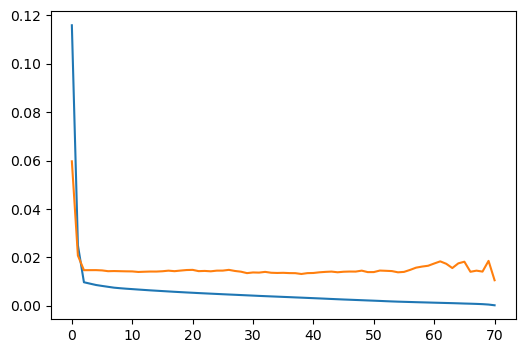

In [5]:
#### how results change after filtering a bit the worse results
i_df = c_df.sort_values("gaba_conc_cr_acc_abs_error",ascending=False)
filename_list = list(i_df["filename"])

abs_error_accs = []
abs_error_models=[]

for i in range(len(filename_list)-1):
    i_df = c_df[~c_df["filename"].isin(filename_list[:i])]
    abs_error_models.append(i_df['gaba_conc_cr_model_abs_error'].mean())
    abs_error_accs.append(i_df['gaba_conc_cr_acc_abs_error'].mean())

fig,ax = plt.subplots(figsize=(6,4))

ax.plot(abs_error_accs,label="accs")
ax.plot(abs_error_models,label="models")

plt.show()

In [ ]:



fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].scatterplot(df["plot"])


In [5]:
c_df[["gaba_conc_cr_model","gaba_conc_cr_acc","gaba_conc_cr_full"]].mean()

gaba_conc_cr_model    0.156766
gaba_conc_cr_acc      0.224001
gaba_conc_cr_full     0.114178
dtype: float64

In [6]:
df.groupby("model").agg({"gaba_conc_cr":"mean"})

,gaba_conc_cr
model,
acc,0.224001
full,0.114178
model,0.156766
